Importando bibliotecas

In [3]:
!pip install shap

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.2 MB/s eta 0:00:00


In [4]:
lolGameDataframe = pd.read_csv('/content/drive/MyDrive/TCC/Dados de 2023/outputData15min.csv')
colNames = ['b_top_goldAt15', 'r_top_goldAt15', 'b_jg_goldAt15', 'r_jg_goldAt15', 'b_mid_goldAt15', 'r_mid_goldAt15', 'b_bot_goldAt15', 'r_bot_goldAt15', 'b_sup_goldAt15', 'r_sup_goldAt15', 'b_top_xpat15', 'r_top_xpat15', 'b_jg_xpat15', 'r_jg_xpat15', 'b_mid_xpat15', 'r_mid_xpat15',	'b_bot_xpat15', 'r_bot_xpat15', 'b_sup_xpat15', 'r_sup_xpat15', 'b_top_csat15', 'r_top_csat15', 'b_jg_csat15', 'r_jg_csat15', 'b_mid_csat15', 'r_mid_csat15', 'b_bot_csat15', 'r_bot_csat15', 'b_sup_csat15', 'r_sup_csat15','b_top_golddiffat15', 'r_top_golddiffat15', 'b_jg_golddiffat15', 'r_jg_golddiffat15', 'b_mid_golddiffat15', 'r_mid_golddiffat15', 'b_bot_golddiffat15', 'r_bot_golddiffat15', 'b_sup_golddiffat15', 'r_sup_golddiffat15', 'b_top_xpdiffat15', 'r_top_xpdiffat15', 'b_jg_xpdiffat15', 'r_jg_xpdiffat15', 'b_mid_xpdiffat15', 'r_mid_xpdiffat15', 'b_bot_xpdiffat15', 'r_bot_xpdiffat15', 'b_sup_xpdiffat15', 'r_sup_xpdiffat15', 'b_top_csdiffat15',  'r_top_csdiffat15', 'b_jg_csdiffat15', 'r_jg_csdiffat15', 'b_mid_csdiffat15', 'r_mid_csdiffat15', 'b_bot_csdiffat15', 'r_bot_csdiffat15', 'b_sup_csdiffat15', 'r_sup_csdiffat15', 'b_top_killsat15', 'r_top_killsat15', 'b_jg_killsat15', 'r_jg_killsat15', 'b_mid_killsat15', 'r_mid_killsat15', 'b_bot_killsat15' ,'r_bot_killsat15', 'b_sup_killsat15', 'r_sup_killsat15', 'b_top_assistsat15', 'r_top_assistsat15', 'b_jg_assistsat15', 'r_jg_assistsat15', 'b_mid_assistsat15', 'r_mid_assistsat15', 'b_bot_assistsat15', 'r_bot_assistsat15', 'b_sup_assistsat15', 'r_sup_assistsat15', 'b_top_deathsat15', 'r_top_deathsat15', 'b_jg_deathsat15', 'r_jg_deathsat15', 'b_mid_deathsat15', 'r_mid_deathsat15', 'b_bot_deathsat15', 'r_bot_deathsat15', 'b_sup_deathsat15', 'r_sup_deathsat15']
print(len(colNames))
attributes = lolGameDataframe[colNames]
target = lolGameDataframe['result']

90


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Separando conjunto de teste e treino, 30% para teste, 70% para treino

In [5]:
test_size = 0.3
random_state = 0

x_train, x_test, y_train, y_test = train_test_split(attributes,
                                                    target,
                                                    test_size = test_size,
                                                    random_state = random_state)



Padronizando os dados para o treinamento

In [6]:
# padronizando dados

sc = StandardScaler()

sc.fit(x_train)

# usar dados que foram padronizados para testar os dados
x_train_std = sc.transform(x_train)

sc.fit(x_test)
x_test_std = sc.transform(x_test)

Testes número de neurôrios X acurácia

In [ ]:
n_neurons = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 200, 300, 400]
acc = []

for neurons in range (1,180):
  classifier = MLPClassifier(hidden_layer_sizes=(neurons),
                           max_iter=800000,
                           activation = 'relu',
                           solver='sgd',
                           random_state=1)
  classifier.fit(x_train_std,
          y_train)

  y_pred = classifier.predict(x_test_std)
  acc.append(accuracy_score(y_test, y_pred)*100)

print(acc)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
[73.77173091458806, 73.39380196523054, 73.84731670445956, 73.77173091458806, 74.30083144368858, 73.92290249433107, 74.22524565381708, 74.14965986394559, 73.46938775510205, 73.99848828420257, 74.6787603930461, 73.77173091458806, 73.31821617535903, 74.14965986394559, 73.46938775510205, 70.29478458049887, 73.92290249433107, 68.55631141345427, 69.0854119425548, 72.56235827664399, 67.8004535147

Gráfico número de neurônios  X acurácia

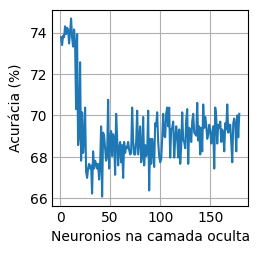

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
plt.xlabel("Neuronios na camada oculta")
plt.ylabel("Acurácia (%)")


plt.plot(range(1,180), acc,)
plt.show()


Treinando a Rede Neural para o tempo de 15 minutos de partida

In [7]:
classifier = MLPClassifier(hidden_layer_sizes=(11),
                           max_iter=800000,
                           activation = 'relu',
                           solver='sgd',
                           random_state=1)
classifier.fit(x_train_std,
        y_train)

y_pred = classifier.predict(x_test_std)

print("accuracia: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))


accuracia: 74.68%


Gerando um classification report

In [6]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.73      0.73       604
           1       0.77      0.76      0.76       719

    accuracy                           0.75      1323
   macro avg       0.74      0.75      0.75      1323
weighted avg       0.75      0.75      0.75      1323



Entendendo a rede neural com SHAP

  0%|          | 0/92 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 18 iterations, i.e. alpha=2.326e-04, with an active set of 18 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 68 iterations, i.e. alpha=3.920e-05, with an active set of 24 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 71 iterations, i.e. alpha=3.656e-05, with an active set of 27 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 72 iterations, alpha=3.796e-05, previous alpha=3.379e-05, with an active set of 27 regressors.
Regressors in active set degenerate. Dropping a regressor, after 22 

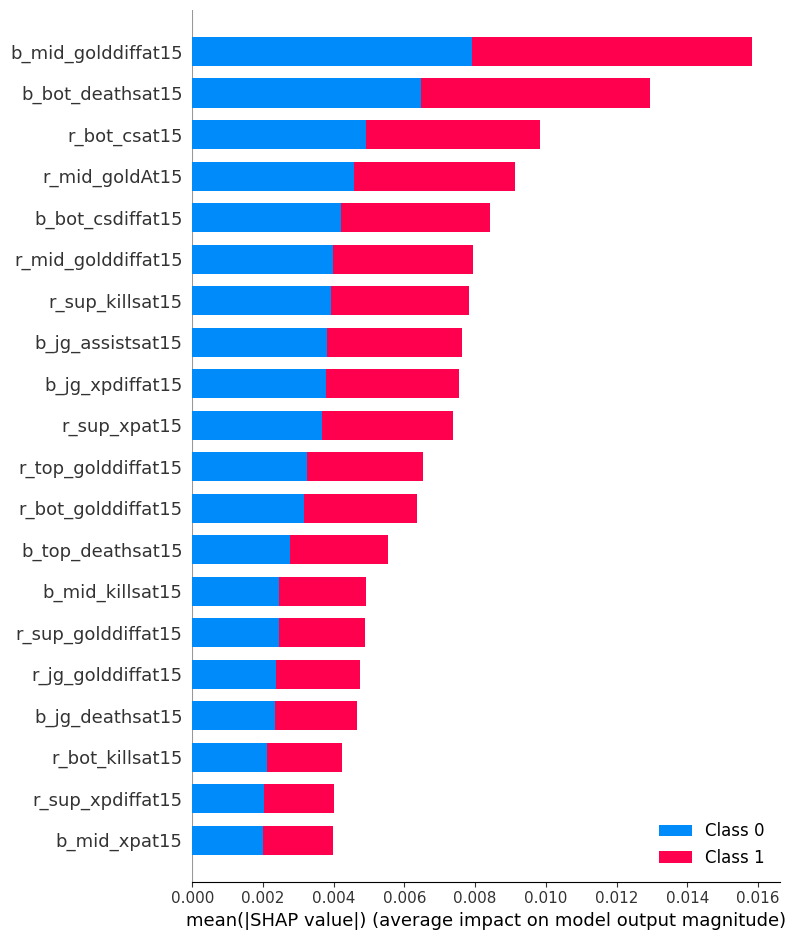

In [ ]:
import shap

shap.initjs()

explainer = shap.KernelExplainer(classifier.predict_proba, x_train)
shap_values = explainer.shap_values(x_test.iloc[0:92,:], nsamples=92)
shap.summary_plot(shap_values, x_test.iloc[0:92,:])

Usando o Summary Plot do SHAP

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/1323 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


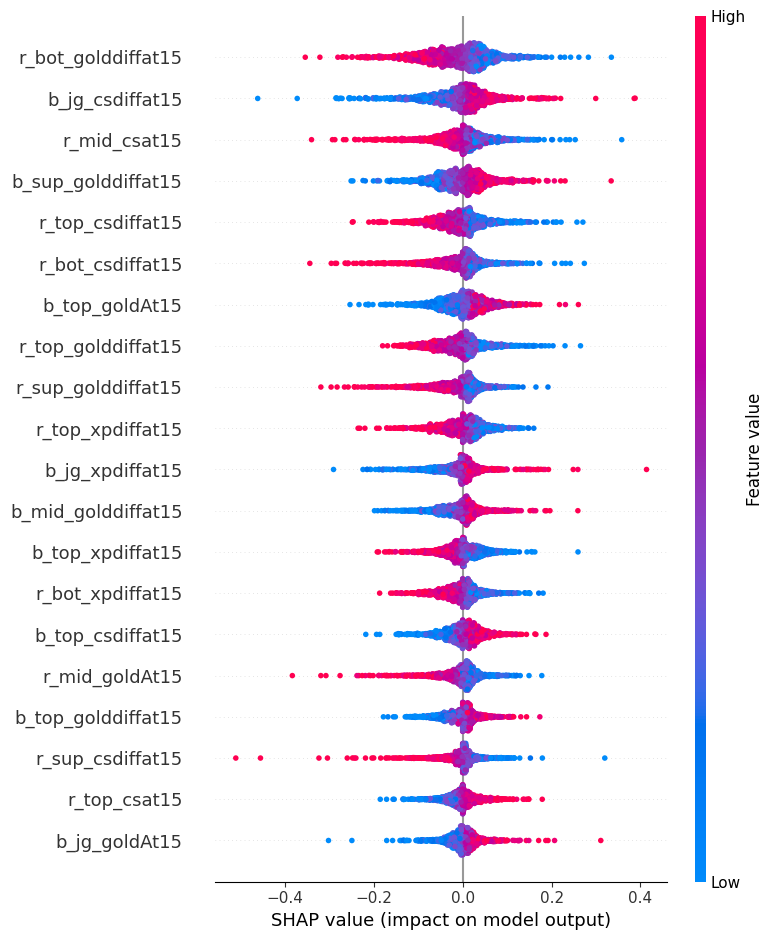

In [8]:
import shap

background_samples = shap.kmeans(x_train_std, 5)

explainer = shap.KernelExplainer(classifier.predict, background_samples)
shap_values = explainer.shap_values(x_test_std)

shap.summary_plot(shap_values, x_test_std, feature_names=colNames)


Utilizando o dependence Plot no primeiro atributo

In [18]:
shap.bar_plot(shap_values=shap_values.any, feature_names=colNames)

TypeError: ignored